In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_znewstd_by_station(df, save_path=None, data_type="z_new_std",
                            bins=None,
                            dpi=300, xlim=None, normalize=False):
    """
    Plot histograms of data_type (z_new_std) for each station, separated by region (3 subplots).
    Each station can be normalized so its histogram peaks at 1.
    Shared bins of 0.1 width for all stations.

    Parameters
    ----------
    df : pd.DataFrame
        Must contain columns: ['station', 'region', data_type]
    save_path : str, optional
        If provided, saves the figure to this path with dpi=300.
    dpi : int, default=300
        Resolution for saved figure.
    xlim : tuple or list, optional
        Limits for x-axis (e.g., (0, 2.5)).
    normalize : bool, default=False
        If True, normalize each histogram so its maximum = 1.
    """

    # Define region colors
    region_colors = {1: 'magenta', 2: 'blue', 3: 'green'}

    # Determine bin range
    x_min = 0 if xlim is None else xlim[0]
    x_max = df["z_new_std"].max() if xlim is None else xlim[1]

    if bins is None:
        bins = np.arange(x_min, x_max + 0.1, 0.1)

    # Sort stations by region
    df = df.sort_values(by=["region", "station"])

    regions = sorted(df["region"].unique())
    n_regions = len(regions)

    fig, axes = plt.subplots(1, n_regions, figsize=(14, 5), sharey=True)

    if n_regions == 1:
        axes = [axes]  # ensure iterable

    for ax, region in zip(axes, regions):
        region_df = df[df["region"] == region]

        color = region_colors.get(region, "gray")
        # stations = region_df["station"].unique()

        stations = region_df["station"].unique()
        cmap = plt.cm.get_cmap("tab20", len(stations))  # or tab10

        for idx, station in enumerate(stations):
            station_color = cmap(idx)
            subset = region_df[region_df["station"] == station]
            data = subset[data_type].dropna()
            if len(data) == 0:
                continue

            counts, _ = np.histogram(data, bins=bins)
            if normalize and counts.max() > 0:
                counts = counts / counts.max()

            bin_centers = 0.5 * (bins[1:] + bins[:-1])
            ax.bar(
                bin_centers, counts, width=0.1, alpha=0.4,
                color=None, align="center",
                edgecolor=station_color, linewidth=1.5, fill=False
            )

            # Median line
            median = data.median()
            ax.axvline(median, color=station_color, linestyle="--", linewidth=1.5)

            # Station label above median
            y_top = (1.05 if normalize else ax.get_ylim()[1] * 0.9)
            ax.text(
                median - 0.03, y_top, station,
                rotation=90, color=station_color,
                ha="center", va="bottom", fontsize=10
            )

        ax.set_xlabel("Standard Deviation (km)")
        ax.set_xlim(xlim if xlim else (x_min, x_max))
        ax.set_title(f"Region {int(region)}", color=color)
        if normalize:
            ax.set_ylim(0, 1.2)
        ax.grid(alpha=0.3)

    axes[0].set_ylabel("Normalized Frequency" if normalize else "Frequency")

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches="tight")

    plt.show()


In [31]:
radii_km = 30

path = f"/groups/igonin/ecastillo/CMEZ-SPHighResCatalog/data/z/summary_standard_{radii_km}km.csv"
df = pd.read_csv(path,parse_dates=['origin_time'])
df =df.drop_duplicates(subset=['ev_id','station'])

sp_df = df[df['Author_new']=='S-P Method']
print("Total picks before filtering preferred:", len(sp_df))
sp_df = sp_df[sp_df["preferred"]]
print("Total picks after filtering preferred:", len(sp_df))
display(sp_df)

Total picks before filtering preferred: 1895
Total picks after filtering preferred: 1679


,ev_id,origin_time,latitude,longitude,z_ori_from_sea_level,Author_ori,z_ori_from_surface,station,preferred,z_new_from_surface,z_new_std,z_new_iqr,region,median_vpvs,std_vpvs,median_vp,std_vp,Author_new,S-P,z_new_from_sea_level
8305,texnet2021ceed,2021-01-31 17:43:00.830000,31.66748,-104.48315,6.281,TexNet HighRes,7.615708,PB28,True,6.789950,0.229028,0.213065,1.0,1.710104,0.022326,5.63,0.009109,S-P Method,True,5.455242
8512,texnet2021dhtf,2021-02-16 22:16:06.512999,31.66795,-104.48710,5.744,TexNet HighRes,7.094409,PB28,True,6.257286,0.198876,0.213065,1.0,1.710326,0.020912,5.60,0.010342,S-P Method,True,4.906877
8619,texnet2021dvhh,2021-02-24 08:09:05.846000,31.66752,-104.48323,6.275,TexNet HighRes,7.610045,PB28,True,7.003015,0.238213,0.319598,1.0,1.710673,0.021171,5.64,0.012555,S-P Method,True,5.667970
8628,texnet2021dxbd,2021-02-25 07:18:18.743999,31.66771,-104.49470,7.063,TexNet HighRes,8.423599,PB28,True,7.748744,0.254765,0.319598,1.0,1.710107,0.021295,5.67,0.008633,S-P Method,True,6.388145
8642,texnet2021dyhd,2021-02-25 23:28:42.350000,31.66770,-104.49401,7.002,TexNet HighRes,8.363012,PB28,True,7.642211,0.260963,0.319598,1.0,1.690065,0.022094,5.66,0.009877,S-P Method,True,6.281199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19767,texnet2024ianl,2024-04-24 03:04:34.805999,31.68365,-104.29077,8.167,TexNet HighRes,9.317372,SA02,True,9.027136,0.377874,0.639196,2.0,1.712918,0.026589,5.39,0.021930,S-P Method,True,7.876764
19769,texnet2024ibgp,2024-04-24 12:44:54.465000,31.68272,-104.29056,8.419,TexNet HighRes,9.568784,SA02,True,9.133668,0.372831,0.639196,2.0,1.713282,0.026923,5.40,0.020967,S-P Method,True,7.983884
19785,texnet2024icyi,2024-04-25 10:51:01.173000,31.60604,-103.97408,9.116,TexNet HighRes,10.081552,WB03,True,12.223116,0.353652,0.532663,3.0,1.636770,0.016327,5.47,0.013487,S-P Method,True,11.257564
19815,texnet2024idyf,2024-04-25 23:54:48.378000,31.60887,-103.98351,7.475,TexNet HighRes,8.448870,WB03,True,10.731658,0.310955,0.426131,3.0,1.637071,0.016555,5.40,0.015535,S-P Method,True,9.757788


In [43]:
import os
custom_palette = {"PB35": "magenta", 
                  "PB36": "magenta", 
                  "PB28": "magenta", 
                  "PB37": "magenta", 
                  "WB03": "#ffffff", 
                  "SA02": "#f1840f", 
                  "PB24": "#0ea024", 
                  "PB26": "#f1840f", 
                  "PB31": "#0ea024", 
                  "PB04": "red", 
                  "PB16": "red", 
                  }

stations_path = "/groups/igonin/ecastillo/CMEZ-SPHighResCatalog/data/stations/delaware_onlystations_160824.csv"
stations = pd.read_csv(stations_path)
stations = stations[["network", "station", "latitude", "longitude", "elevation"]]
stations = stations[stations["station"].isin(list(custom_palette.keys()))]

stations_with_picks = list(set(sp_df["station"].to_list()))
order = stations[stations["station"].isin(stations_with_picks)]
order = order.sort_values("longitude", ignore_index=True, ascending=True)
order = order.drop_duplicates(subset="station")
order = order["station"].to_list()
order

['PB37', 'PB28', 'PB35', 'PB36', 'SA02', 'PB26', 'PB31', 'PB24', 'WB03']

/tmp/ipykernel_2577964/1588351877.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(stations))  # or tab10
/tmp/ipykernel_2577964/1588351877.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(stations))  # or tab10
/tmp/ipykernel_2577964/1588351877.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(stations))  # or tab10


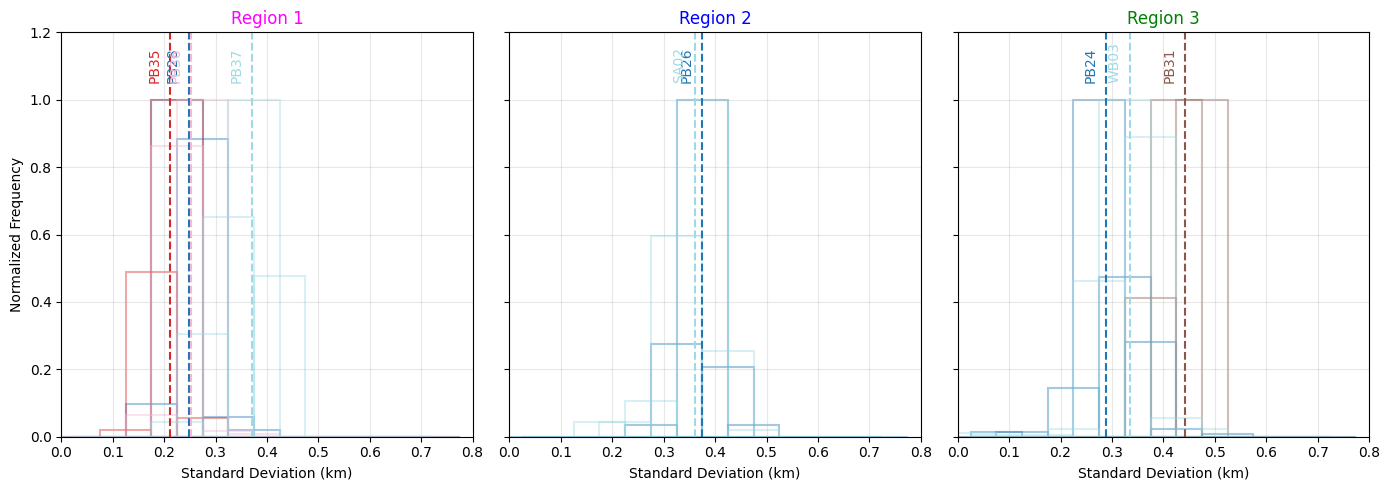

In [44]:
plot_znewstd_by_station(sp_df, save_path="z_new_std_histograms.png",
                        xlim=(0, 0.8),
                        #  bins = 20,
                         bins = np.arange(0, 0.8, 0.05),
                          normalize=True)

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_vpvsstd_boxplots_by_station(df, save_path=None, 
                                     data_type="vpvs_std",
                                     order=None,
                                     dpi=300, ylim=None):
    """
    Boxplots of vpvs_std for each station, grouped by region (1 subplot per region).
    """

    region_colors = {1: 'magenta', 2: 'blue', 3: 'green'}

    if order is None:
        order = ['PB37', 'PB28', 'PB35', 'PB36', 'SA02', 'PB24', 'WB03']
        
    order_map = {st: i for i, st in enumerate(order)}
    df = df.sort_values(by=["region", "station"])
    regions = sorted(df["region"].unique())
    n_regions = len(regions)

    fig, axes = plt.subplots(1, n_regions, figsize=(16, 6), sharey=True)  # larger figsize

    if n_regions == 1:
        axes = [axes]

    for ax, region in zip(axes, regions):
        color = region_colors.get(region, "gray")
        region_df = df[df["region"] == region]

        stations = sorted(
            region_df["station"].unique(),
            key=lambda x: order_map.get(x, 10_000 + hash(x))
        )

        data_list = [
            region_df[region_df["station"] == st][data_type].dropna()
            for st in stations
        ]

        bp = ax.boxplot(
            data_list,
            labels=stations,
            patch_artist=True,
            medianprops=dict(color="black"),
            boxprops=dict(color=color, facecolor="white", linewidth=1.5),
            whiskerprops=dict(color=color),
            capprops=dict(color=color),
            flierprops=dict(marker='o', markerfacecolor=color, markersize=5, alpha=0.5)  # slightly larger fliers
        )

        ax.set_title(f"Region R{int(region)}", color=color, fontsize=16)
        ax.set_xlabel("Station", fontsize=14)

        if ylim is not None:
            posy = ylim[1]
        else:
            posy = max([d.max() for d in data_list if len(d) > 0])

        for i, data in enumerate(data_list):
            count = len(data)
            ax.text(
                i + 1,
                posy - posy * 0.07,
                f"n={count}",
                ha="center", va="bottom",
                color="red",
                fontsize=12,
                bbox=dict(facecolor="white", edgecolor="black", alpha=0.7)
            )

        if ylim:
            ax.set_ylim(ylim)

        ax.grid(alpha=0.3)
        ax.tick_params(axis='x', labelsize=12, rotation=45)
        ax.tick_params(axis='y', labelsize=12)

    if data_type == "vpvs_std":
        axes[0].set_ylabel("Vp/Vs Standard Deviation", fontsize=14)
    elif data_type == "z_new_std":
        axes[0].set_ylabel("Depth Uncertainty (km)", fontsize=14)
    else:
        axes[0].set_ylabel(f"{data_type}", fontsize=14)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches="tight")

    plt.show()

/tmp/ipykernel_2577964/2885323476.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipykernel_2577964/2885323476.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipykernel_2577964/2885323476.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


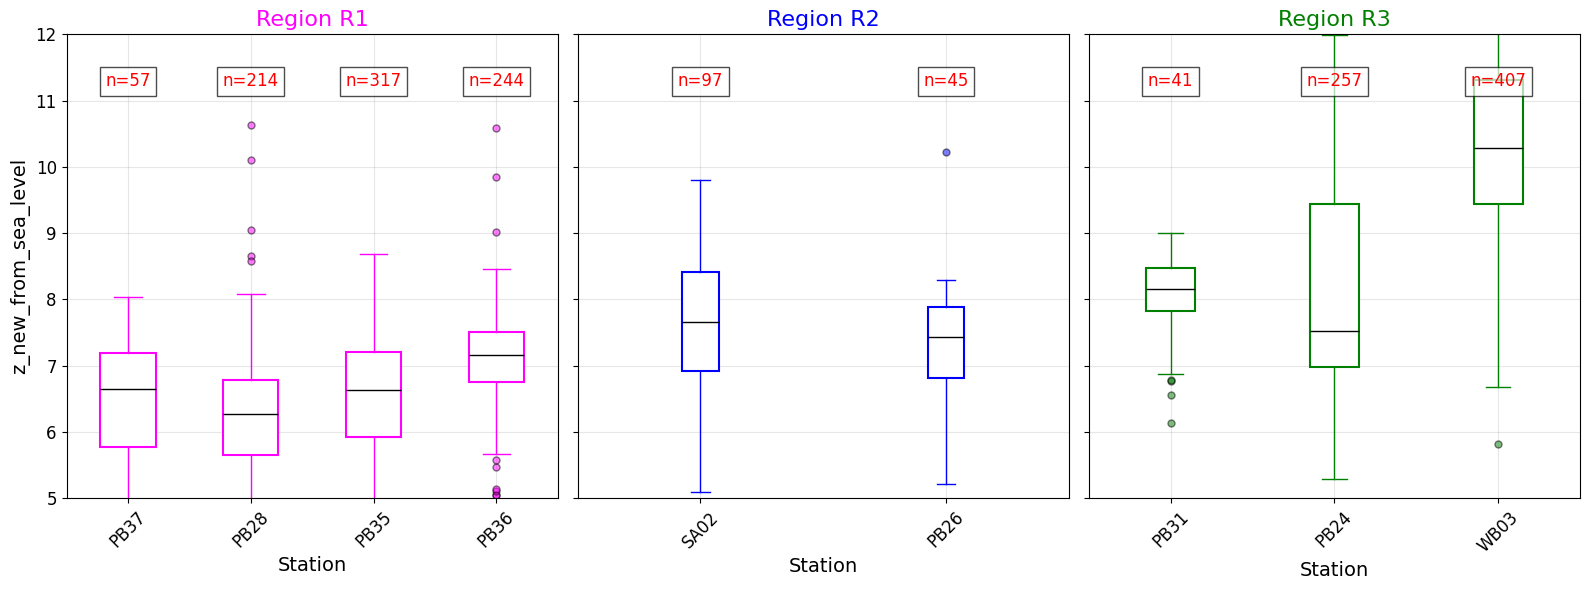

In [92]:
data_type="z_new_from_sea_level"
plot_vpvsstd_boxplots_by_station(sp_df, 
                                save_path=f"{data_type}.png",
                                data_type=data_type, 
                                order=order,
                                ylim=(5, 12))

/tmp/ipykernel_2577964/2885323476.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipykernel_2577964/2885323476.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipykernel_2577964/2885323476.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


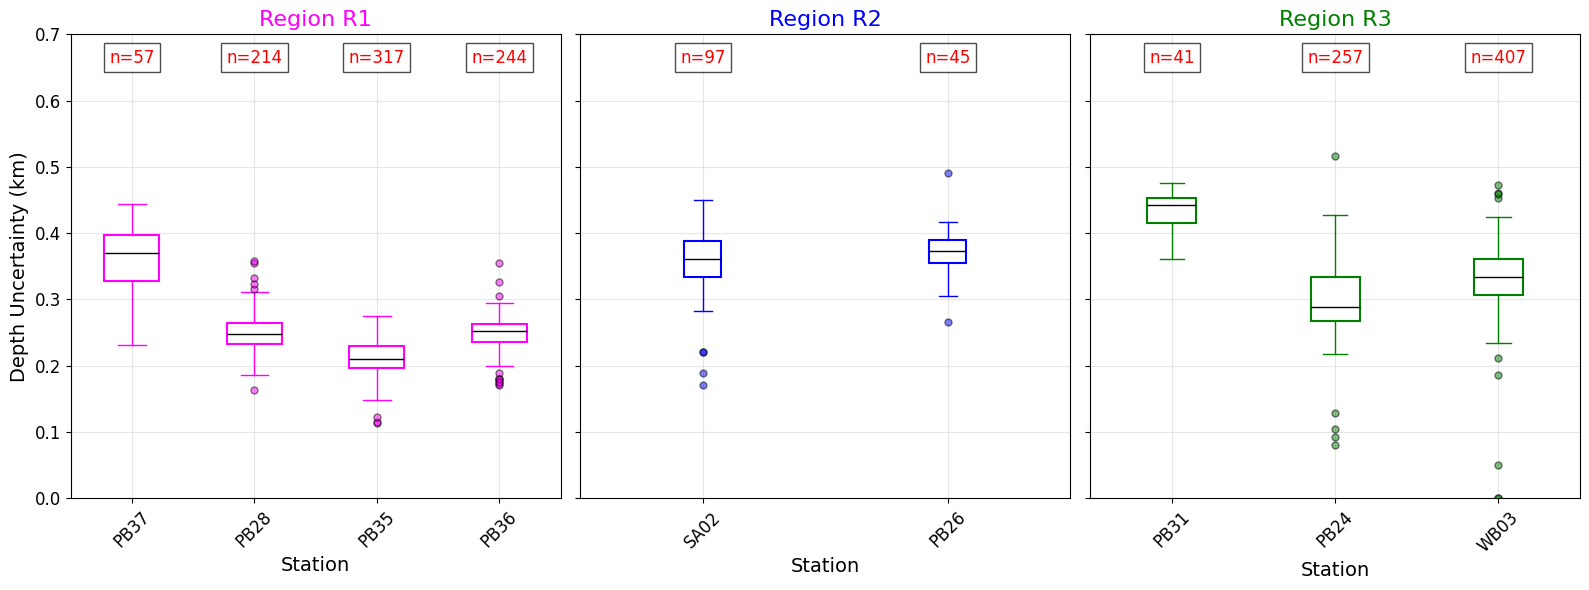

In [94]:
data_type="z_new_std"
plot_vpvsstd_boxplots_by_station(sp_df, 
                                save_path=f"{data_type}.png",
                                data_type=data_type, 
                                order=order,
                                ylim=(0, 0.7))


/tmp/ipykernel_2577964/221220487.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


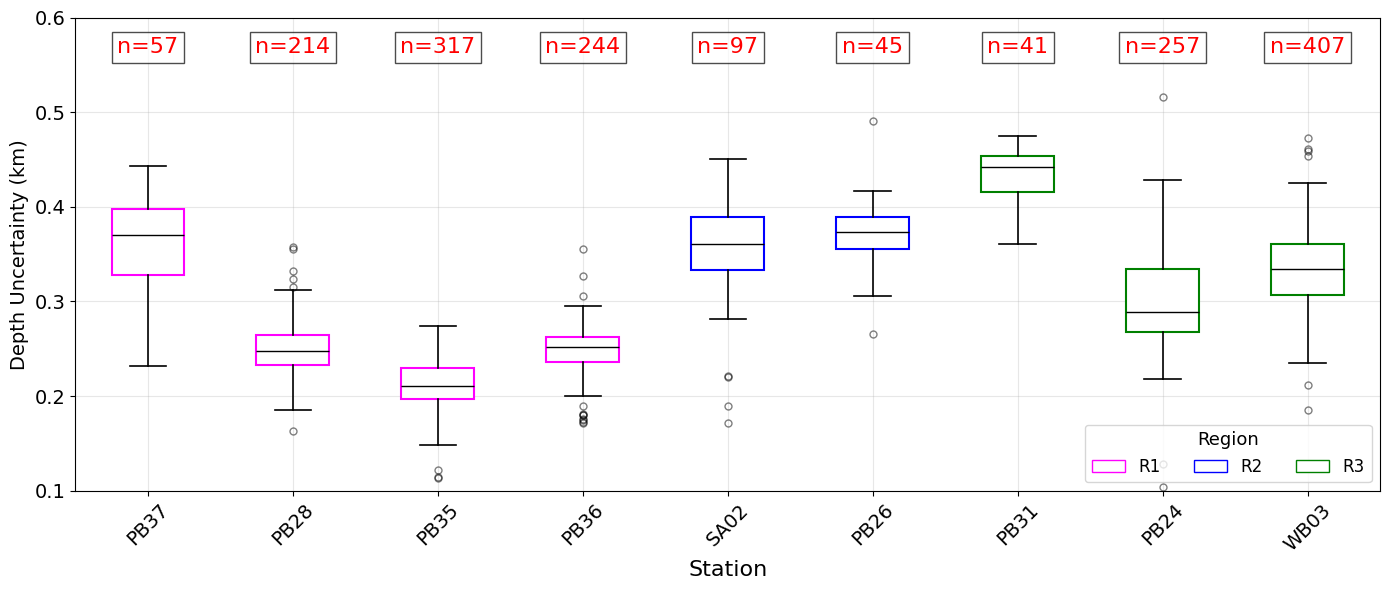

In [106]:
def plot_vpvsstd_boxplot_single_axis(df, save_path=None, 
                                     data_type="vpvs_std",
                                     order=None,
                                     dpi=300, ylim=None):
    """
    Boxplot of vpvs_std (or other metric) for each station on a single axis,
    colored by region.
    """

    import matplotlib.pyplot as plt
    import pandas as pd
    import matplotlib.patches as mpatches

    # Define region colors
    region_colors = {1: 'magenta', 2: 'blue', 3: 'green'}

    if order is None:
        order = ['PB37', 'PB28', 'PB35', 'PB36', 'SA02', 'PB24', 'WB03']

    order_map = {st: i for i, st in enumerate(order)}
    df = df.sort_values(by=["region", "station"])

    # Sort stations by order
    stations = sorted(
        df["station"].unique(),
        key=lambda x: order_map.get(x, 10_000 + hash(x))
    )

    # Prepare data and colors
    data_list = [df[df["station"] == st][data_type].dropna() for st in stations]
    box_colors = [region_colors.get(df[df["station"] == st]["region"].iloc[0], "gray") 
                  for st in stations]

    fig, ax = plt.subplots(figsize=(14, 6))

    bp = ax.boxplot(
        data_list,
        labels=stations,
        patch_artist=True,
        medianprops=dict(color="black"),
        boxprops=dict(linewidth=1.5),
        whiskerprops=dict(linewidth=1.2),
        capprops=dict(linewidth=1.2),
        flierprops=dict(marker='o', markersize=5, alpha=0.5)
    )

    # Set colors by region
    for patch, color in zip(bp['boxes'], box_colors):
        patch.set_facecolor("white")
        patch.set_edgecolor(color)

    # Annotate number of events
    if ylim is not None:
        posy = ylim[1]
    else:
        posy = max([d.max() for d in data_list if len(d) > 0])

    for i, data in enumerate(data_list):
        count = len(data)
        ax.text(
            i + 1,
            posy - posy * 0.07,
            f"n={count}",
            ha="center", va="bottom",
            color="red",
            fontsize=16,
            bbox=dict(facecolor="white", edgecolor="black", alpha=0.7)
        )

    # Labels, title, ticks
    ax.set_xlabel("Station", fontsize=16)
    ylabel = "Vp/Vs Standard Deviation" if data_type == "vpvs_std" else data_type
    ax.set_ylabel(ylabel, fontsize=16)
    ax.tick_params(axis='x', labelsize=14, rotation=45)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(alpha=0.3)

    # Create custom legend
    handles = [mpatches.Patch(facecolor='white', edgecolor=color, label=f"R{reg}") 
               for reg, color in region_colors.items()]
    ax.legend(handles=handles, title="Region", fontsize=12, 
              title_fontsize=13, loc='lower right',
              ncol=3)

    if ylim:
        ax.set_ylim(ylim)

    if data_type == "vpvs_std":
        ax.set_ylabel("Vp/Vs Standard Deviation", fontsize=14)
    elif data_type == "z_new_std":
        ax.set_ylabel("Depth Uncertainty (km)", fontsize=14)
    else:
        ax.set_ylabel(f"{data_type}", fontsize=14)

    ax.legend

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches="tight")
    plt.show()

data_type="z_new_std"
plot_vpvsstd_boxplot_single_axis(sp_df, 
                                save_path=f"{data_type}.png",
                                data_type=data_type, 
                                order=order,
                                ylim=(0.1, 0.6))


/tmp/ipykernel_3476227/2804929161.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipykernel_3476227/2804929161.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipykernel_3476227/2804929161.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


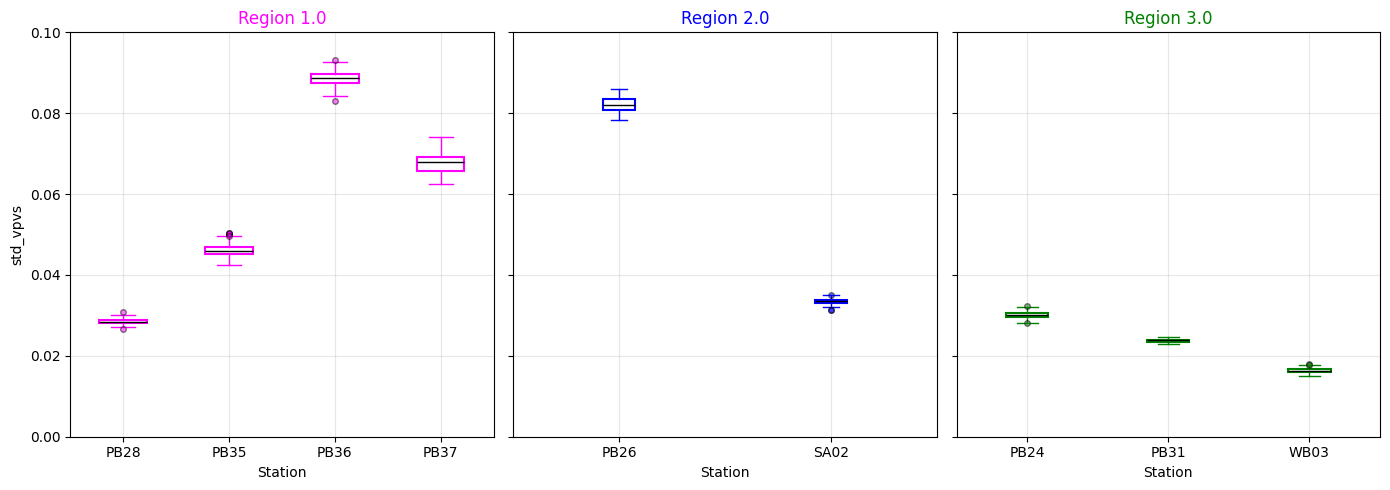

In [28]:
data_type="std_vpvs"
plot_vpvsstd_boxplots_by_station(sp_df, 
                                save_path=f"{data_type}.png",
                                data_type=data_type, 
                                ylim=(0, 0.1))

/tmp/ipykernel_3476227/2804929161.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipykernel_3476227/2804929161.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipykernel_3476227/2804929161.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


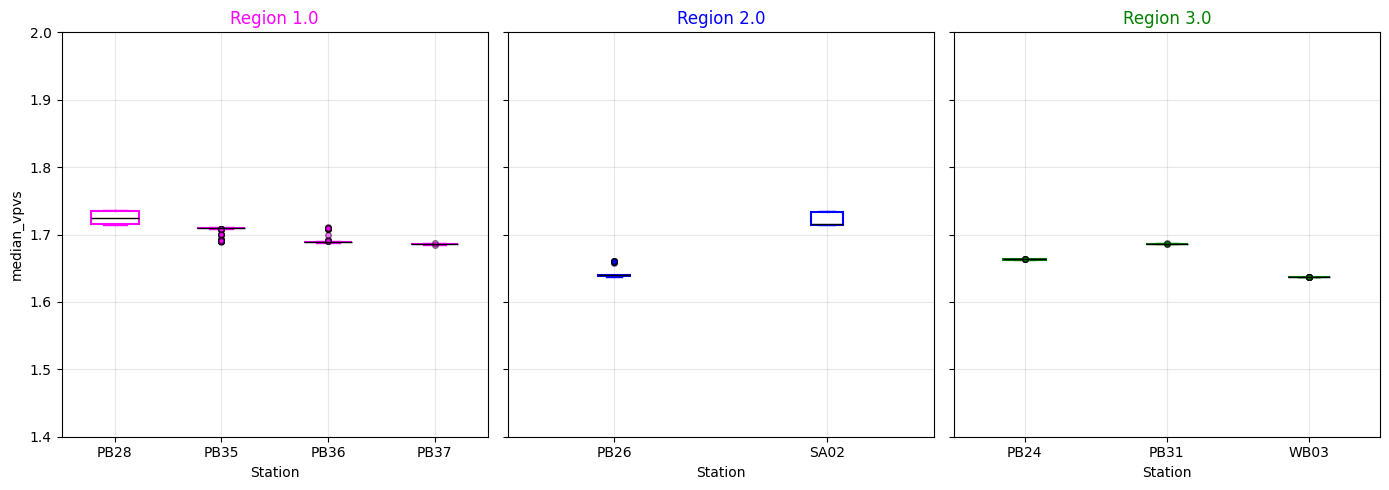

In [36]:
data_type="median_vpvs"
plot_vpvsstd_boxplots_by_station(sp_df, 
                                save_path=f"{data_type}.png",
                                data_type=data_type, 
                                ylim=(1.4,2))

/tmp/ipykernel_1341544/547602070.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipykernel_1341544/547602070.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipykernel_1341544/547602070.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


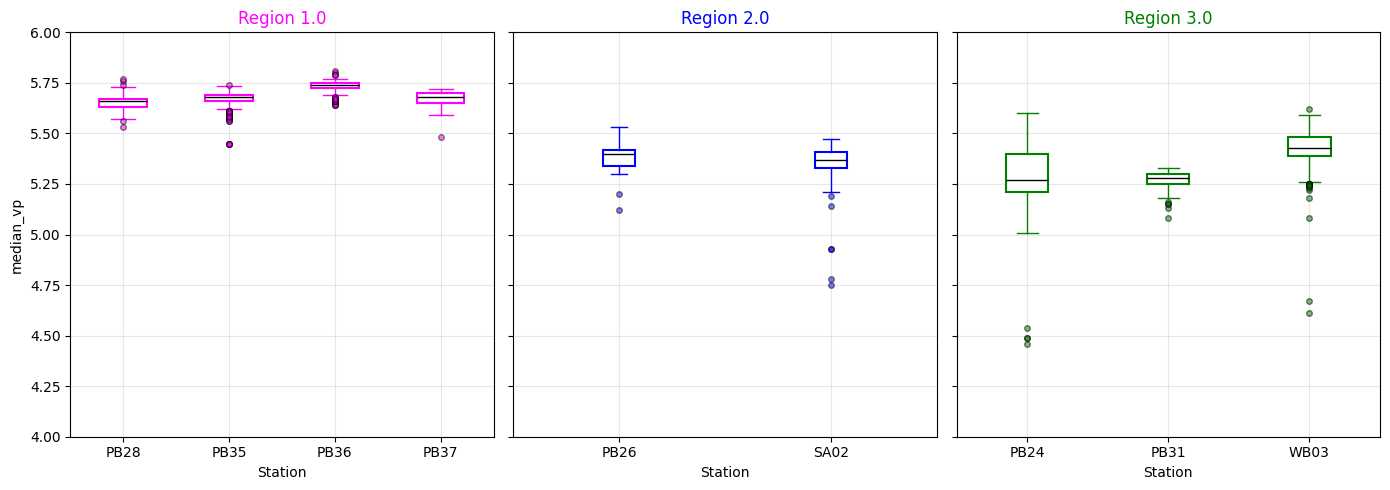

In [42]:
plot_vpvsstd_boxplots_by_station(sp_df, data_type="median_vp", ylim=(4, 6))

/tmp/ipykernel_1341544/547602070.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipykernel_1341544/547602070.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipykernel_1341544/547602070.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


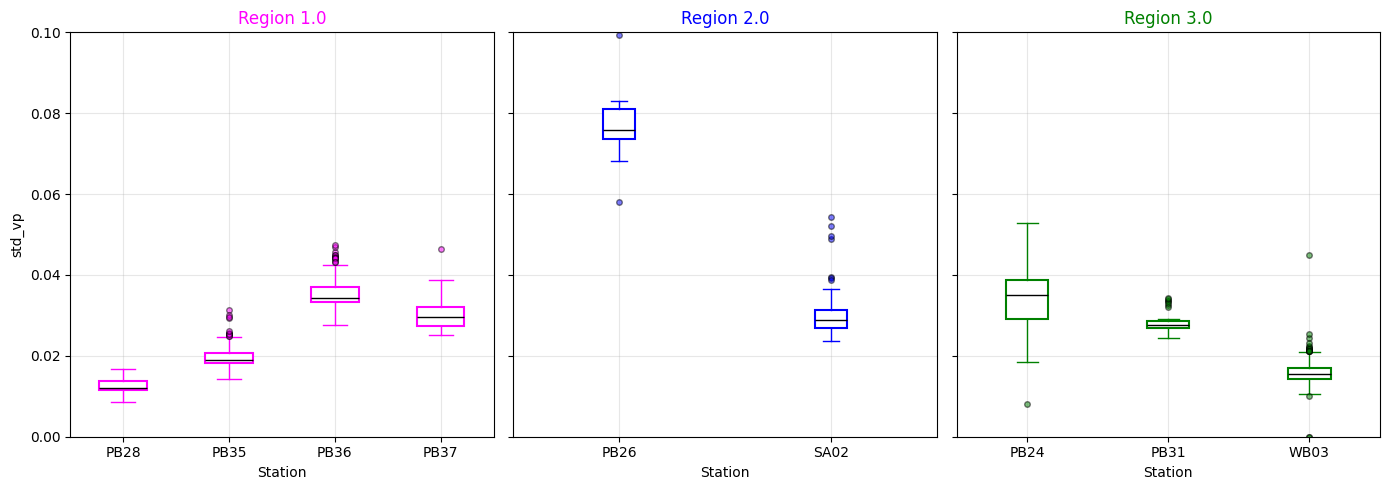

In [43]:
plot_vpvsstd_boxplots_by_station(sp_df, data_type="std_vp", ylim=(0, 0.1))

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

def plot_depth_vs_time_by_region_with_iqr(
    df,
    output_path=None,
    basement_min=None,
    basement_max=None,
    xlim=None,
    ylim=None,
    dpi=300,
    colors=None,
    time_col='origin_time',
    depth_col='z_new_from_surface',
    region_col='region',
    basement_col='basement_elevation_from_sea_level',
    only_regions=["R1", "R2", "R3"],
    plot_seismicity=False,
    ax=None,
    window='90D',
    legend=True,
    title=False
):
    # Ensure datetime
    if not pd.api.types.is_datetime64_any_dtype(df[time_col]):
        df[time_col] = pd.to_datetime(df[time_col])

    # Drop NaNs
    df = df.dropna(subset=[depth_col, region_col, basement_col])

    if only_regions:
        df = df[df[region_col].isin(only_regions)]

    # Filter by basement elevation
    if basement_min is not None:
        df = df[df[basement_col] >= basement_min]
    if basement_max is not None:
        df = df[df[basement_col] <= basement_max]

    # Create figure/axes if not provided
    external_ax = ax is not None
    if not external_ax:
        fig, ax = plt.subplots(figsize=(12, 6))
    else:
        fig = ax.figure

    unique_regions = sorted(df[region_col].unique())
    # Define region colors
    if not colors:
      palette = sns.color_palette("tab10", len(unique_regions))
    else:
      palette = colors
    region_colors = dict(zip(unique_regions, palette))

    # Plot each region
    for region in unique_regions:
        region_df = df[df[region_col] == region].sort_values(by=time_col)

        if plot_seismicity:
            ax.scatter(
                region_df[time_col],
                region_df[depth_col],
                s=10,
                alpha=0.5,
                label=region,
                color=region_colors[region],
                edgecolors='k',
                linewidths=0.2
            )

        if len(region_df) >= 10:
            rolling = region_df.set_index(time_col)[depth_col].rolling(window)
            q25 = rolling.quantile(0.25)
            q75 = rolling.quantile(0.75)

            ax.fill_between(
                q25.index,
                q25,
                q75,
                color=region_colors[region],
                alpha=0.2,
                label=f"{region} IQR"
            )
            ax.plot(q25.index, q25, color=region_colors[region], linewidth=2, linestyle='--', alpha=1)
            ax.plot(q75.index, q75, color=region_colors[region], linewidth=2, linestyle='--', alpha=1)

    # Axis formatting
    if title:
      ax.set_title("Depth vs Time by Region with IQR Shading")
    ax.set_xlabel("Time")
    ax.set_ylabel("Depth from Surface (km)")


    if xlim:
        ax.set_xlim(pd.to_datetime(xlim[0]), pd.to_datetime(xlim[1]))
    if ylim:
        ax.set_ylim(ylim)
    if legend:
      ax.legend(title="Region", bbox_to_anchor=(1.01, 1), loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    ax.invert_yaxis()
    plt.tight_layout()

    # Save if path is provided
    if output_path:
        fig.savefig(output_path, dpi=dpi, bbox_inches='tight')

    return fig, ax

In [49]:
sphighres_path = "/groups/igonin/ecastillo/CMEZ-SPHighResCatalog/data/z/summary_reloc_standard_30km_with_region.csv"
sphighres_df = pd.read_csv(sphighres_path, parse_dates=["origin_time"])
sphighres_df

,ev_id,origin_time,latitude,longitude,z_ori_from_sea_level,Author_ori,z_ori_from_surface,station,preferred,z_new_from_surface,...,median_vpvs,std_vpvs,median_vp,std_vp,Author_new,S-P,z_new_from_sea_level,x,y,basement_elevation_from_sea_level
0,texnet2017jrka,2017-05-18 14:11:41.887000,31.62876,-103.80102,5.540,TexNet HighRes,6.463691,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S-P Relative Reloc,NaN,9.086844,0.031629,-0.103801,5.435393
1,texnet2017kznc,2017-06-06 06:22:15.189999,31.57210,-103.86593,5.797,TexNet HighRes,6.759605,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S-P Relative Reloc,NaN,9.343820,0.031572,-0.103866,5.252292
2,texnet2017lziz,2017-06-20 09:49:52.139000,31.50556,-103.81682,3.381,TexNet HighRes,4.313758,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S-P Relative Reloc,NaN,7.029084,0.031506,-0.103817,5.389009
3,texnet2017mfrv,2017-06-23 21:07:14.614000,31.57727,-103.80949,2.250,TexNet HighRes,3.177272,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S-P Relative Reloc,NaN,5.796830,0.031577,-0.103809,5.413175
4,texnet2017pvek,2017-08-14 01:06:52.482999,31.64703,-104.52875,5.453,TexNet HighRes,6.869585,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S-P Relative Reloc,NaN,4.704066,0.031647,-0.104529,2.455405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13533,texnet2024ikln,2024-04-29 13:27:43.779000,31.68332,-104.29226,8.545,TexNet HighRes,9.694553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S-P Relative Reloc,NaN,8.281480,0.031683,-0.104292,3.394398
13534,texnet2024ikxy,2024-04-29 19:43:44.466999,31.60054,-104.10902,2.871,TexNet HighRes,3.911409,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S-P Relative Reloc,NaN,3.147558,0.031601,-0.104109,4.564852
13535,texnet2024ilby,2024-04-29 21:45:51.722999,31.71600,-104.32193,7.872,TexNet HighRes,9.031609,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S-P Relative Reloc,NaN,8.127732,0.031716,-0.104322,3.238730
13536,texnet2024ilim,2024-04-30 01:05:22.192000,31.54682,-104.15154,8.472,TexNet HighRes,9.525737,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,S-P Relative Reloc,NaN,8.954128,0.031547,-0.104152,4.295186


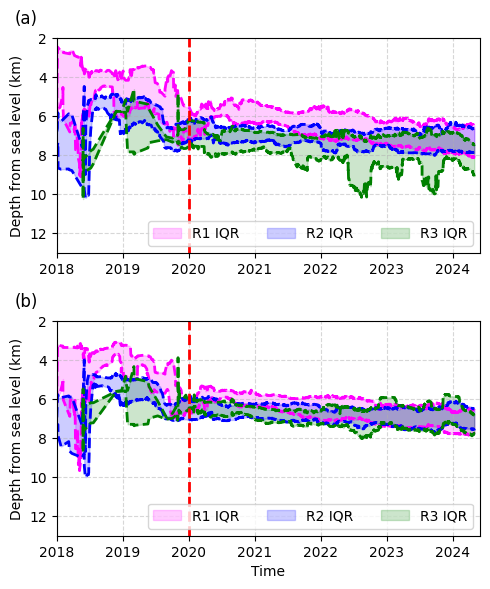

In [108]:
import string
fig, axes = plt.subplots(2, 1, figsize=(5, 6))

# First plot: depth vs time with IQR
plot_depth_vs_time_by_region_with_iqr(sphighres_df,
                                      xlim=["2018-01-01", "2024-06-01"],
                                      ylim=[2, 13],
                                      depth_col='z_new_from_sea_level',
                                basement_min=2.0,
                                 basement_max=6.0,
                                      colors=["magenta","blue","green"],
                                      legend=False,
                                      ax=axes[0])
plot_depth_vs_time_by_region_with_iqr(sphighres_df,
                                      xlim=["2018-01-01", "2024-06-01"],
                                      ylim=[2, 13],
                                      depth_col='z_ori_from_sea_level',
                                basement_min=2.0,
                                 basement_max=6.0,
                                      colors=["magenta","blue","green"],
                                      legend=False,
                                      ax=axes[1])

axes[0].set_xlabel(None,fontsize=10)
axes[0].tick_params(axis='both', labelsize=10)
axes[0].set_ylabel("Depth from sea level (km)",fontsize=10)
axes[0].set_title(None)
axes[0].legend( loc='lower right',ncol=3)

axes[1].set_xlabel("Time",fontsize=10)
axes[1].tick_params(axis='both', labelsize=10)
axes[1].set_ylabel("Depth from sea level (km)",fontsize=10)
axes[1].set_title(None)
axes[1].legend( loc='lower right',ncol=3)

# Convert 2020 to a datetime
vline_time = pd.Timestamp("2020-01-01")

# Add vertical dashed red line to both axes
for ax in axes:
    ax.axvline(vline_time, color='red', linestyle='--', linewidth=2)

# Auto-labeling with letters (a), (b), (c), ...
for n, ax in enumerate(axes):
    ax.annotate(f"({string.ascii_lowercase[n]})",
                xy=(-0.1, 1.05),  # Slightly outside top-left
                xycoords='axes fraction',
                ha='left',
                va='bottom',
                fontsize="large",
                fontweight="normal",
                # bbox=box
                )


fig.tight_layout()
fig.savefig("depthcomparisonvstime.png", dpi=300, bbox_inches='tight')
plt.show()

In [66]:
sp_data_path = "/groups/igonin/ecastillo/CMEZ-SPHighResCatalog/data/z/summary.csv"
sp_data = pd.read_csv(sp_data_path)
sp_data = sp_data[sp_data["preferred"]]
sp_data

,key,ev_id,station,preferred,region,tstp,median_depth,mode_depth,median_vp,median_vpvs,iqr_depth,std_depth,std_vp,std_vpvs
0,/sta_PB24/vpvs_30km/ev_texnet2023naua,texnet2023naua,PB24,True,3,0.517864,3.593970,3.593970,4.49,1.661405,0.106533,0.080594,0.018439,0.018683
1,/sta_PB24/vpvs_30km/ev_texnet2023xfvn,texnet2023xfvn,PB24,True,3,0.565056,3.913568,3.807035,4.49,1.661243,0.213065,0.128102,0.031407,0.017736
2,/sta_PB24/vpvs_30km/ev_texnet2023xfvl,texnet2023xfvl,PB24,True,3,0.417000,2.954774,2.954774,4.54,1.661091,0.106533,0.103962,0.005803,0.018923
3,/sta_PB24/vpvs_30km/ev_texnet2023lccc,texnet2023lccc,PB24,True,3,0.523650,3.593970,3.593970,4.49,1.661010,0.106533,0.092243,0.018126,0.019063
4,/sta_PB24/vpvs_30km/ev_texnet2023vxcq,texnet2023vxcq,PB24,True,3,1.681668,14.140704,14.140704,5.54,1.661307,0.532663,0.427959,0.014647,0.018176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,/sta_WB03/vpvs_30km/ev_texnet2023kwrm,texnet2023kwrm,WB03,True,3,1.210221,10.305528,10.305528,5.38,1.636849,0.532663,0.322398,0.017909,0.017207
1891,/sta_WB03/vpvs_30km/ev_texnet2023yefk,texnet2023yefk,WB03,True,3,1.482277,12.862312,12.862312,5.50,1.637032,0.639196,0.372363,0.014338,0.016462
1892,/sta_WB03/vpvs_30km/ev_texnet2023zouh,texnet2023zouh,WB03,True,3,1.485503,12.862312,12.862312,5.50,1.636915,0.532663,0.377407,0.013580,0.016538
1893,/sta_WB03/vpvs_30km/ev_texnet2023sdzr,texnet2023sdzr,WB03,True,3,1.452277,12.542714,12.542714,5.49,1.636854,0.532663,0.366149,0.015281,0.016300


In [67]:
sp_data = pd.merge(sp_data, sphighres_df[["ev_id","origin_time"]], on="ev_id", how="left")

sp_data

,key,ev_id,station,preferred,region,tstp,median_depth,mode_depth,median_vp,median_vpvs,iqr_depth,std_depth,std_vp,std_vpvs,origin_time
0,/sta_PB24/vpvs_30km/ev_texnet2023naua,texnet2023naua,PB24,True,3,0.517864,3.593970,3.593970,4.49,1.661405,0.106533,0.080594,0.018439,0.018683,2023-07-05 10:04:31.464999
1,/sta_PB24/vpvs_30km/ev_texnet2023xfvn,texnet2023xfvn,PB24,True,3,0.565056,3.913568,3.807035,4.49,1.661243,0.213065,0.128102,0.031407,0.017736,2023-11-27 11:52:53.090000
2,/sta_PB24/vpvs_30km/ev_texnet2023xfvl,texnet2023xfvl,PB24,True,3,0.417000,2.954774,2.954774,4.54,1.661091,0.106533,0.103962,0.005803,0.018923,2023-11-27 11:50:18.727000
3,/sta_PB24/vpvs_30km/ev_texnet2023lccc,texnet2023lccc,PB24,True,3,0.523650,3.593970,3.593970,4.49,1.661010,0.106533,0.092243,0.018126,0.019063,2023-06-07 16:10:43.731000
4,/sta_PB24/vpvs_30km/ev_texnet2023vxcq,texnet2023vxcq,PB24,True,3,1.681668,14.140704,14.140704,5.54,1.661307,0.532663,0.427959,0.014647,0.018176,2023-11-08 11:30:19.379000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,/sta_WB03/vpvs_30km/ev_texnet2023kwrm,texnet2023kwrm,WB03,True,3,1.210221,10.305528,10.305528,5.38,1.636849,0.532663,0.322398,0.017909,0.017207,2023-06-04 17:08:37.713000
1675,/sta_WB03/vpvs_30km/ev_texnet2023yefk,texnet2023yefk,WB03,True,3,1.482277,12.862312,12.862312,5.50,1.637032,0.639196,0.372363,0.014338,0.016462,2023-12-10 20:08:41.216000
1676,/sta_WB03/vpvs_30km/ev_texnet2023zouh,texnet2023zouh,WB03,True,3,1.485503,12.862312,12.862312,5.50,1.636915,0.532663,0.377407,0.013580,0.016538,2023-12-30 20:32:22.635999
1677,/sta_WB03/vpvs_30km/ev_texnet2023sdzr,texnet2023sdzr,WB03,True,3,1.452277,12.542714,12.542714,5.49,1.636854,0.532663,0.366149,0.015281,0.016300,2023-09-16 08:01:15.785000


In [81]:
def plot_ts_tp_multiple_stations(df, stations, ax=None, xlim=None,ylim=None,
                                 time_col='origin_time', ts_tp_col='ts-tp',
                                 colors=None,
                                 plot_seismicity=False,
                                 plot_error_bar=False,
                                 plot_iqr=True,window='90D',title=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 3))

    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])
    df = df[df['station'].isin(stations)]

    if not colors:
      palette = sns.color_palette("tab10", len(stations))

    else:
      palette = colors
    station_colors = dict(zip(stations, palette))

    # Define region colors
    #unique_regions = sorted(df[region_col].unique())
    #palette = sns.color_palette("tab10", len(unique_regions))
    #region_colors = dict(zip(unique_regions, palette))

    for station in stations:
        station_df = df[df['station'] == station]
        if plot_seismicity:
          ax.scatter(station_df[time_col], station_df[ts_tp_col],
                   label=station, s=10, alpha=0.7,
                   color=station_colors[station], edgecolors='k', linewidths=0.2)
        # IQR shading per station
        if plot_iqr and len(station_df) >= 10:
            station_df = station_df.set_index(time_col).sort_index()
            rolling = station_df[ts_tp_col].rolling(window)

            q25 = rolling.quantile(0.25)
            q75 = rolling.quantile(0.75)
            station_df.reset_index(inplace=True)
            ax.fill_between(
                q25.index,
                q25,
                q75,
                color=station_colors[station],
                alpha=0.2,
                label=f"{station} IQR"
            )
        if plot_error_bar:
          station_df = station_df.set_index(time_col).sort_index()
          rolling = station_df[ts_tp_col].rolling(window)
          q25 = rolling.quantile(0.25)
          q50 = rolling.quantile(0.5)
          q75 = rolling.quantile(0.75)

          station_df.reset_index(inplace=True)

          ax.errorbar(
                station_df[time_col],
                station_df[ts_tp_col],
                yerr=[q50-q25,q75-q50],
                fmt='o',
                markersize=2,
                label=station,
                color=station_colors[station],
                alpha=0.4,
                capsize=2,
                elinewidth=1,
                linewidth=0.5
            )
    if title:
      ax.set_title("ts - tp vs Time by Station")
    ax.set_xlabel("Time")
    ax.set_ylabel("ts - tp (s)")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    if xlim:
        ax.set_xlim(pd.to_datetime(xlim[0]), pd.to_datetime(xlim[1]))
    if ylim:
        ax.set_ylim(ylim)

    ax.legend(title="Station", bbox_to_anchor=(1.01, 1), loc='upper left')

    return ax

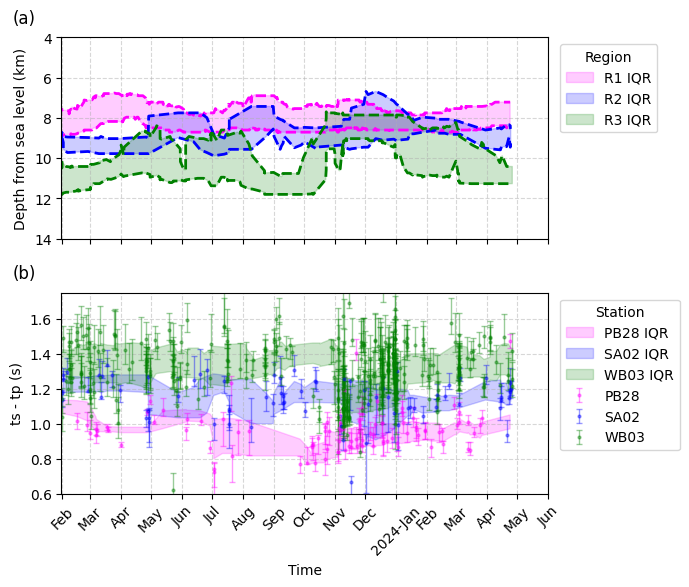

In [90]:
import string
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(2, 1, figsize=(7, 6),sharex=True)

# First plot: depth vs time with IQR
plot_depth_vs_time_by_region_with_iqr(sphighres_df,
                                      xlim=["2023-01-01", "2024-06-01"],
                                      ylim=[4, 14],
                                      colors=["magenta","blue","green"],
                                basement_min=2.0,
                                 basement_max=6.0,
                                      ax=axes[0],
                                      window='60D',)

# Other three plots: ts-tp vs time for specific stations
plot_ts_tp_multiple_stations(
    df=sp_data ,  # Replace with your actual ts-tp dataframe
    stations=["PB28","SA02","WB03"],
    #stations=["PB28","PB36","PB37","PB28", "SA02", "WB03","PB24"],
    xlim=["2023-01-31", "2024-06-01"],
    ax=axes[1],
    colors=["magenta","blue","green"],
    ts_tp_col='tstp',
    ylim=(0.6,1.75),
    plot_iqr=True,
    plot_seismicity=False,
    plot_error_bar=True,
    window='60D',
)


def custom_date_formatter(x, pos):
    date = mdates.num2date(x)
    if date.month == 1:
        return f"{date.year}-{date.strftime('%b')}"
    else:
        return date.strftime('%b')  # shows month and last 2 digits of year, like 07/23

locator = mdates.MonthLocator(interval=1)
formatter = FuncFormatter(custom_date_formatter)

for ax in axes:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.tick_params(axis='x', rotation=45)
#axes[0].xaxis.set_major_formatter(DateFormatter('%Y-%m'))

axes[0].set_xlabel(None,fontsize=10)
axes[0].tick_params(axis='both', labelsize=10)
axes[0].set_ylabel("Depth from sea level (km)",fontsize=10)
axes[0].set_title(None)
#axes[0].legend( loc='lower right',ncol=3)

axes[1].set_xlabel("Time",fontsize=10)
axes[1].tick_params(axis='both', labelsize=10)
axes[1].set_ylabel("ts - tp (s)",fontsize=10)
axes[1].set_title(None)
#axes[1].legend( loc='lower right',ncol=3)

# Auto-labeling with letters (a), (b), (c), ...
for n, ax in enumerate(axes):
    ax.annotate(f"({string.ascii_lowercase[n]})",
                xy=(-0.1, 1.05),  # Slightly outside top-left
                xycoords='axes fraction',
                ha='left',
                va='bottom',
                fontsize="large",
                fontweight="normal",
                # bbox=box
                )

fig.tight_layout()
fig.savefig("SPdepthtimevstime2021.png", dpi=300, bbox_inches='tight')
plt.show()